<a href="https://colab.research.google.com/github/nurulalyh/Quiz_KB/blob/main/Kuis_KB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Data Menggunakan Dataset Digits**

Nama : Nurul Aliyah Dyah Sakhinah

NIM : F55121069

In [74]:
import sklearn
from sklearn import datasets
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [75]:
data = load_digits()

In [76]:
dataset = pd.DataFrame(data.data,columns =data.feature_names)
dataset.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [77]:
dataset.shape

(1797, 64)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

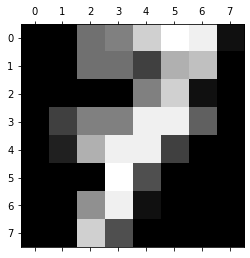

In [78]:
pl.gray()
pl.matshow(data.images[7])
pl.show

In [79]:
n_samples = len(data.images)
print(n_samples)

1797


In [80]:
X = data.images.reshape((n_samples, -1))
y = data.target

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


In [82]:
model_linear = svm.SVC(kernel='linear', degree=3, gamma='scale')
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

In [83]:
model_linear.score(X_test, y_test)

0.9822222222222222

In [84]:
model_RBF = svm.SVC(degree=3, gamma='scale', kernel='rbf')
model_RBF.fit(X_train, y_train)

y_pred2 = model_RBF.predict(X_test)
model_RBF.score(X_test, y_test)

1.0

In [85]:
from sklearn.metrics import classification_report
predictions = model_linear.predict(X_test)
print(classification_report(y_test, predictions))
print("Mcc : ",metrics.matthews_corrcoef(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.96      1.00      0.98        49
           2       0.97      1.00      0.99        39
           3       1.00      1.00      1.00        48
           4       0.98      0.98      0.98        56
           5       0.96      1.00      0.98        46
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        37
           8       0.96      0.96      0.96        46
           9       1.00      0.93      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Mcc :  0.980269096399182
